In [230]:
rm(list = ls())

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa', 'Hmisc', 'tseries','aTSA','FitAR')

ipak(packages)

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa     Hmisc 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
  tseries      aTSA     FitAR 
     TRUE      TRUE      TRUE

In [256]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)
library(Hmisc)
library(aTSA)
library(lmtest)
library(FitAR)

In [257]:
setwd("/Users/ning/Library/Mobile Documents/com~apple~CloudDocs/Working_Directory/Tex_MD/Teaching/tutorial/6003/W4")

In [258]:
data <- read_csv("AUQuGDP.csv")
data <- na.omit(data)

Rows: 241 Columns: 5

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Time, t
dbl (3): AuGDP, quarter, year


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [259]:
describe(data)

data 

 5  Variables      241  Observations
--------------------------------------------------------------------------------
Time 
       n  missing distinct 
     241        0      241 

lowest : 01apr1960 01apr1961 01apr1962 01apr1963 01apr1964
highest: 01oct2015 01oct2016 01oct2017 01oct2018 01oct2019
--------------------------------------------------------------------------------
AuGDP 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
      241         0       241         1 2.265e+11 1.386e+11 7.191e+10 8.291e+10 
      .25       .50       .75       .90       .95 
1.242e+11 1.983e+11 3.256e+11 4.196e+11 4.504e+11 

lowest : 6.46830e+10 6.54860e+10 6.59580e+10 6.62320e+10 6.64730e+10
highest: 4.72267e+11 4.75156e+11 4.77791e+11 4.78811e+11 4.80280e+11
--------------------------------------------------------------------------------
quarter 
       n  missing distinct     Info     Mean      Gmd 
     241        0        4    0.938    2.494    1.257 
   

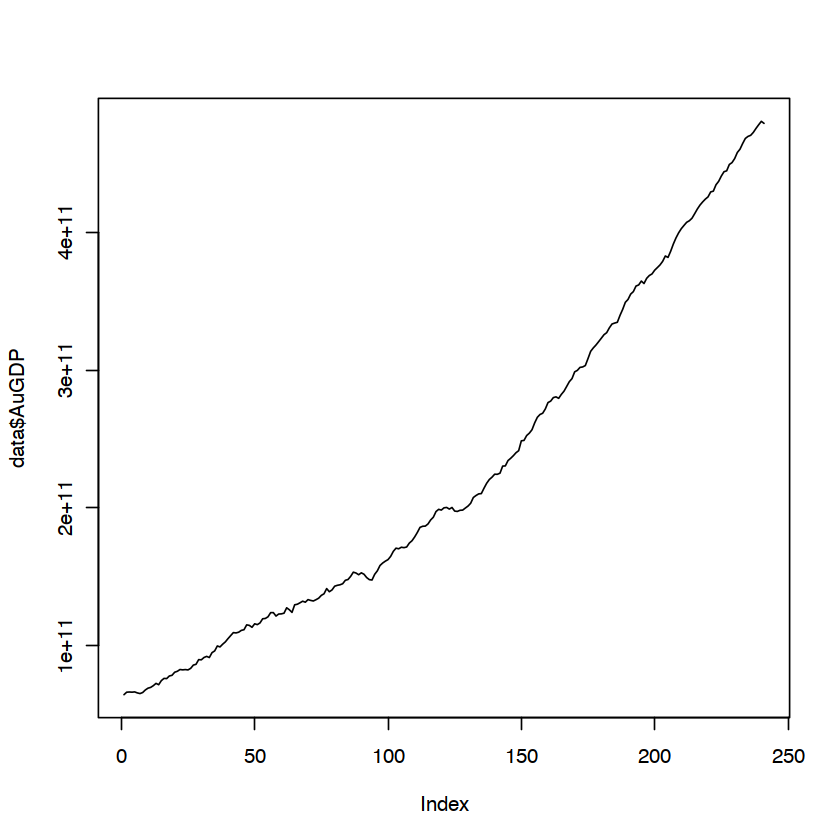

In [260]:
plot(data$AuGDP, type="l")

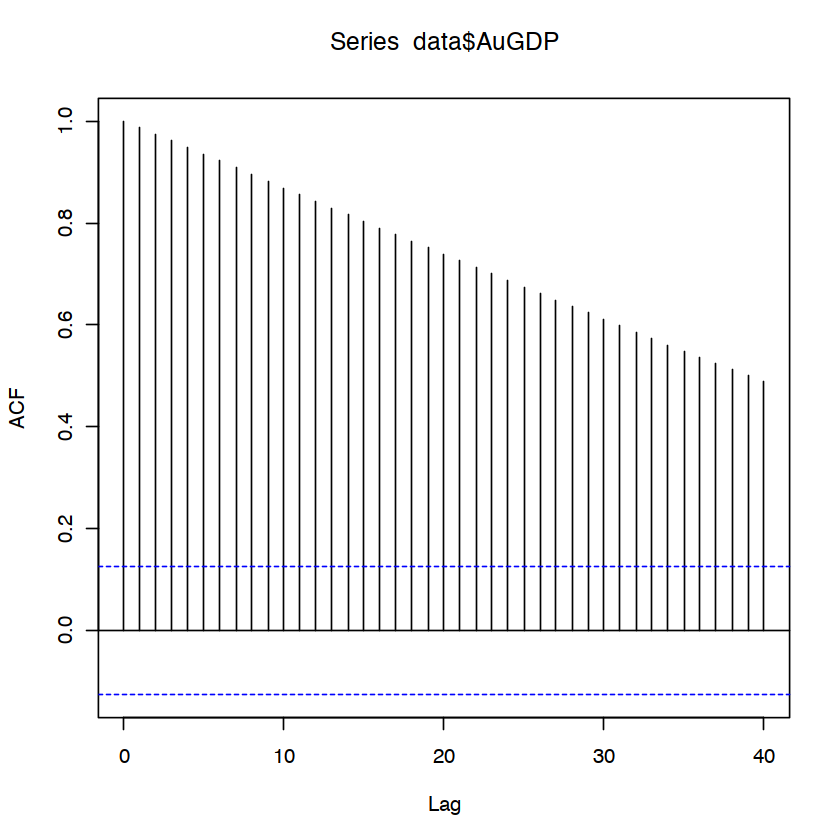

In [261]:
acf(data$AuGDP, lag.max = 40)

In [262]:
adf.test(data$AuGDP, nlag=3)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 17.33    0.99
[2,]   1 10.99    0.99
[3,]   2  8.07    0.99
Type 2: with drift no trend 
     lag  ADF p.value
[1,]   0 6.10    0.99
[2,]   1 5.61    0.99
[3,]   2 4.81    0.99
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -0.346   0.988
[2,]   1 -0.426   0.985
[3,]   2 -0.446   0.984
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [263]:
data$AuGDP_D1 = data$AuGDP - Lag(data$AuGDP, 1)
print(data$AuGDP_D1)

  [1]         NA  1.790e+09  1.500e+08 -1.330e+08  2.000e+08 -7.320e+08
  [7] -4.720e+08  7.460e+08  1.859e+09  1.304e+09  5.620e+08  1.256e+09
 [13]  1.644e+09 -9.490e+08  2.951e+09  1.604e+09 -1.220e+08  1.884e+09
 [19]  4.850e+08  2.238e+09  6.790e+08  1.280e+09 -2.420e+08  2.000e+08
 [25] -2.390e+08  1.132e+09  2.368e+09  5.640e+08  3.383e+09 -1.270e+08
 [31]  1.691e+09  7.950e+08 -8.230e+08  3.527e+09  1.257e+09  3.594e+09
 [37] -6.930e+08  1.968e+09  1.675e+09  2.372e+09  2.188e+09  2.163e+09
 [43] -2.280e+08  5.230e+08  1.329e+09  4.810e+08  3.512e+09 -3.720e+08
 [49] -1.394e+09  2.542e+09 -5.890e+08  1.217e+09  3.013e+09  2.300e+08
 [55]  1.205e+09  3.021e+09  2.400e+07 -2.505e+09  1.461e+09  1.160e+08
 [61]  4.880e+08  3.907e+09 -1.398e+09 -1.913e+09  5.499e+09  4.000e+08
 [67]  1.056e+09  1.145e+09 -7.210e+08  1.868e+09 -5.700e+08 -4.160e+08
 [73]  9.350e+08  1.095e+09  2.042e+09  1.134e+09  3.771e+09 -2.268e+09
 [79]  1.294e+09  2.713e+09  6.440e+08  3.730e+08  7.600e+08  2.

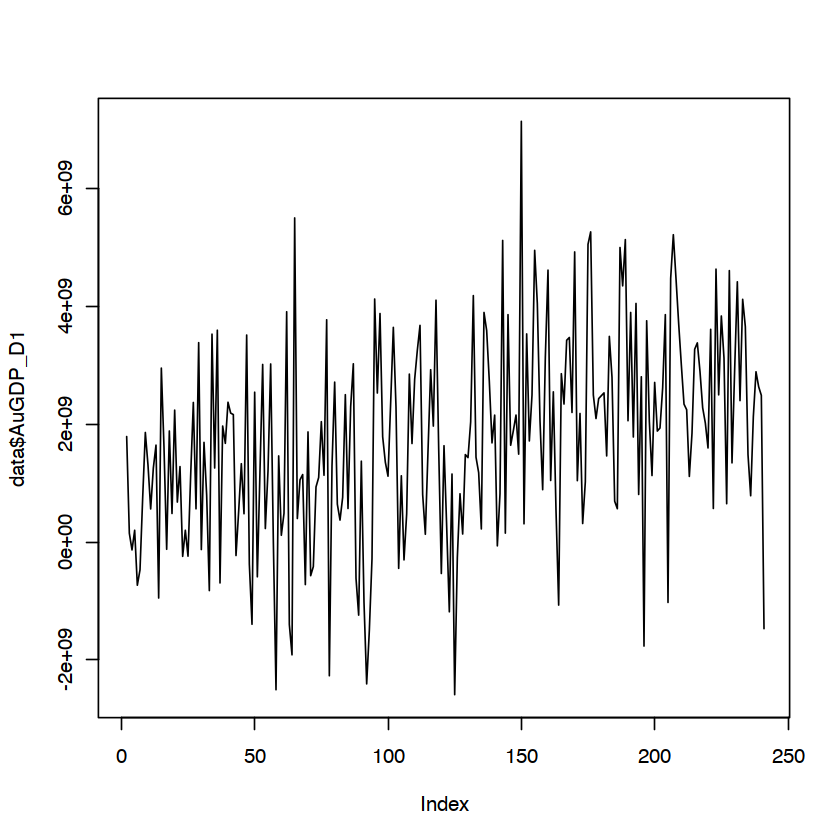

In [264]:
plot(data$AuGDP_D1, type="l")

In [265]:
adf.test(data$AuGDP_D1, nlag=3)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -8.01    0.01
[2,]   1 -4.64    0.01
[3,]   2 -3.28    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -13.17    0.01
[2,]   1  -8.36    0.01
[3,]   2  -6.34    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -15.26    0.01
[2,]   1 -10.16    0.01
[3,]   2  -7.95    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


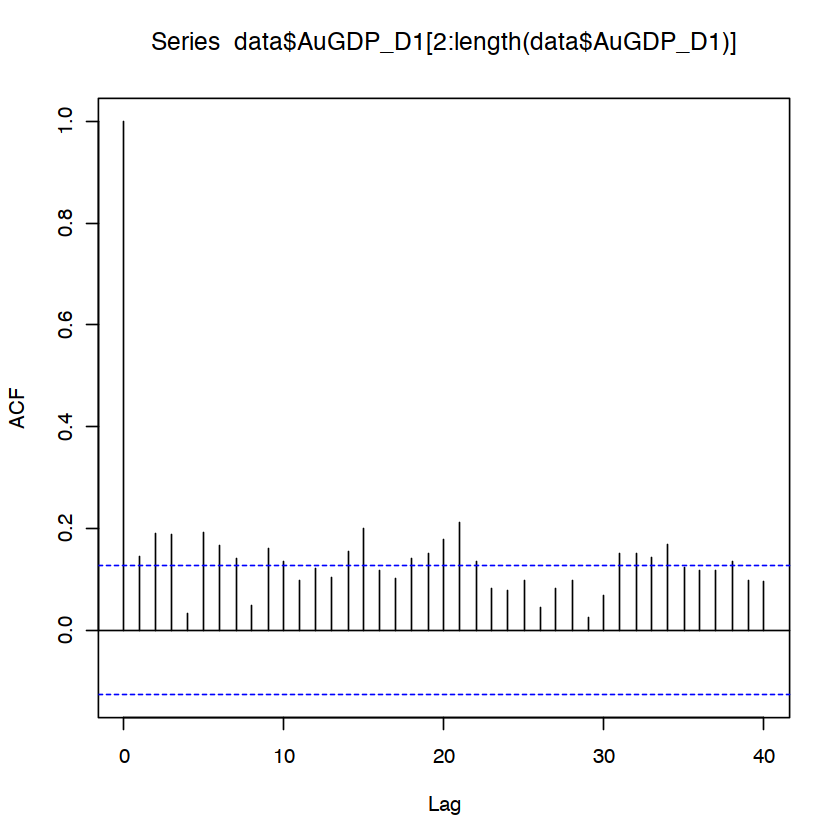

In [266]:
acf(data$AuGDP_D1[2:length(data$AuGDP_D1)], lag.max = 40)

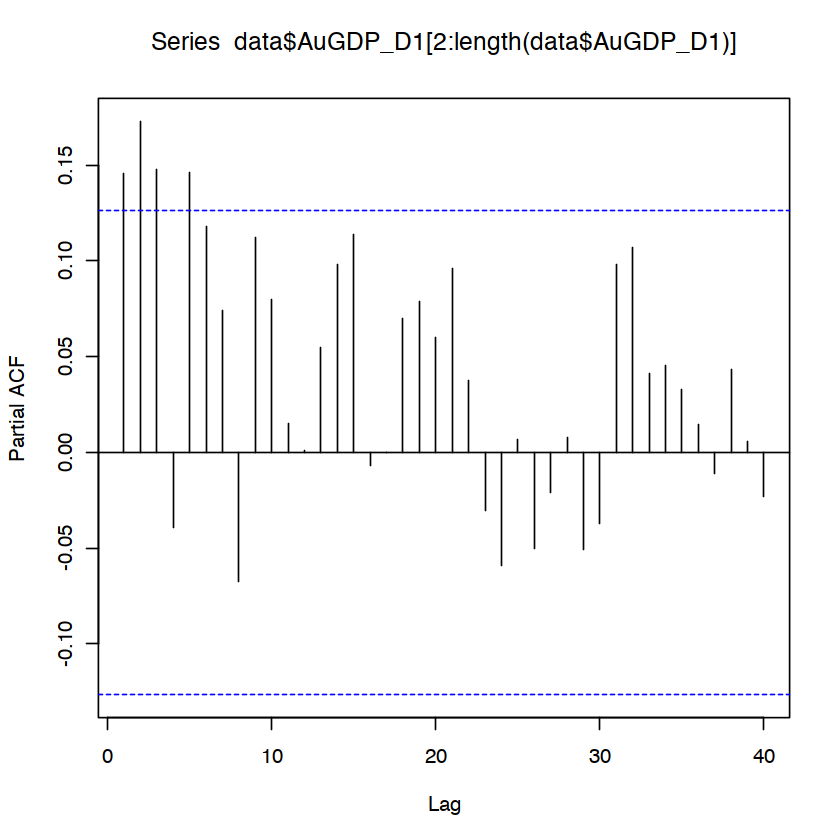

In [267]:
pacf(data$AuGDP_D1[2:length(data$AuGDP_D1)], lag.max = 40)

In [268]:
GDP_D1 = ts(data$AuGDP_D1, start = 1960,end = 2020, frequency = 4)

GDP_D1_2018 = window(GDP_D1, start = 1960, end = c(2018,4))

GDP_D1_2018

,Qtr1,Qtr2,Qtr3,Qtr4
1960,NA,1.790e+09,1.500e+08,-1.330e+08
1961,2.000e+08,-7.320e+08,-4.720e+08,7.460e+08
1962,1.859e+09,1.304e+09,5.620e+08,1.256e+09
1963,1.644e+09,-9.490e+08,2.951e+09,1.604e+09
1964,-1.220e+08,1.884e+09,4.850e+08,2.238e+09
1965,6.790e+08,1.280e+09,-2.420e+08,2.000e+08
1966,-2.390e+08,1.132e+09,2.368e+09,5.640e+08
1967,3.383e+09,-1.270e+08,1.691e+09,7.950e+08
1968,-8.230e+08,3.527e+09,1.257e+09,3.594e+09
1969,-6.930e+08,1.968e+09,1.675e+09,2.372e+09


In [296]:
fit <- Arima(GDP_D1_2018, order=c(5,1,0))
summary(fit)

Series: GDP_D1_2018 
ARIMA(5,1,0) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.8331  -0.5992  -0.4120  -0.4149  -0.2036
s.e.   0.0644   0.0804   0.0853   0.0799   0.0641

sigma^2 estimated as 2.907e+18:  log likelihood=-5304.16
AIC=10620.32   AICc=10620.69   BIC=10641.05

Training set error measures:
                   ME       RMSE        MAE      MPE     MAPE      MASE
Training set 17152570 1683118485 1333702812 9.211774 167.8253 0.6682718
                    ACF1
Training set -0.03087739

In [297]:
fit$bic

[1] 10641.05

In [298]:
fit$aic

[1] 10620.32

In [299]:
coeftest(fit)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1 -0.833115   0.064410 -12.9346 < 2.2e-16 ***
ar2 -0.599200   0.080425  -7.4504 9.307e-14 ***
ar3 -0.412033   0.085261  -4.8326 1.347e-06 ***
ar4 -0.414905   0.079917  -5.1917 2.084e-07 ***
ar5 -0.203576   0.064075  -3.1772  0.001487 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [300]:
confint(fit)

,2.5 %,97.5 %
ar1,-0.9593562,-0.70687439
ar2,-0.7568309,-0.44156905
ar3,-0.5791416,-0.24492511
ar4,-0.5715386,-0.25827130
ar5,-0.3291602,-0.07799168



	Ljung-Box test

data:  Residuals from ARIMA(5,1,0)
Q* = 14.16, df = 3, p-value = 0.002695

Model df: 5.   Total lags used: 8



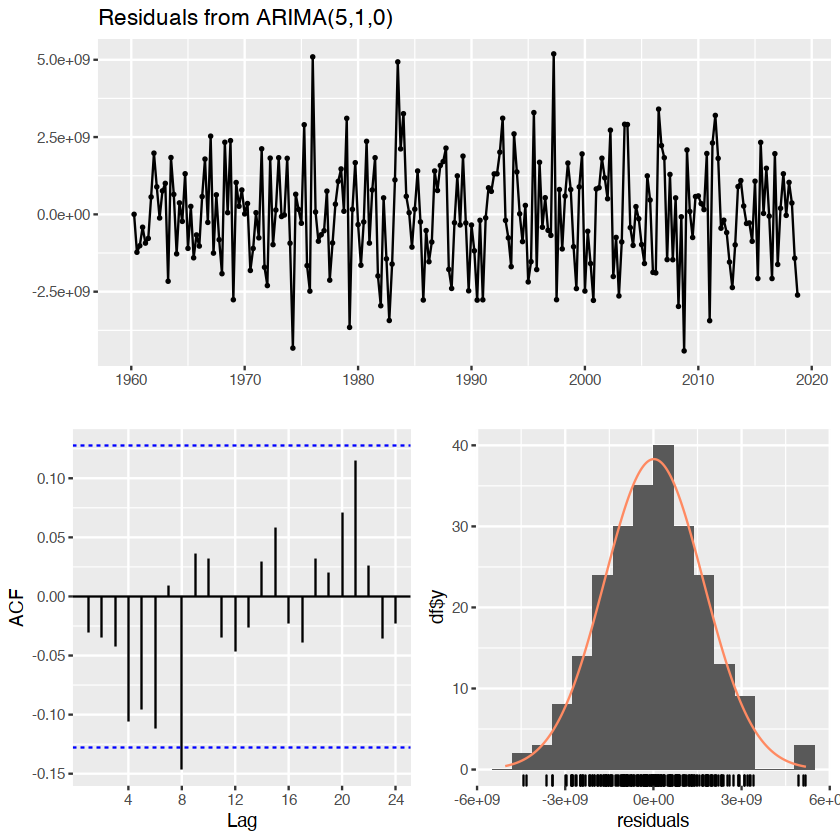

In [301]:
checkresiduals(fit)

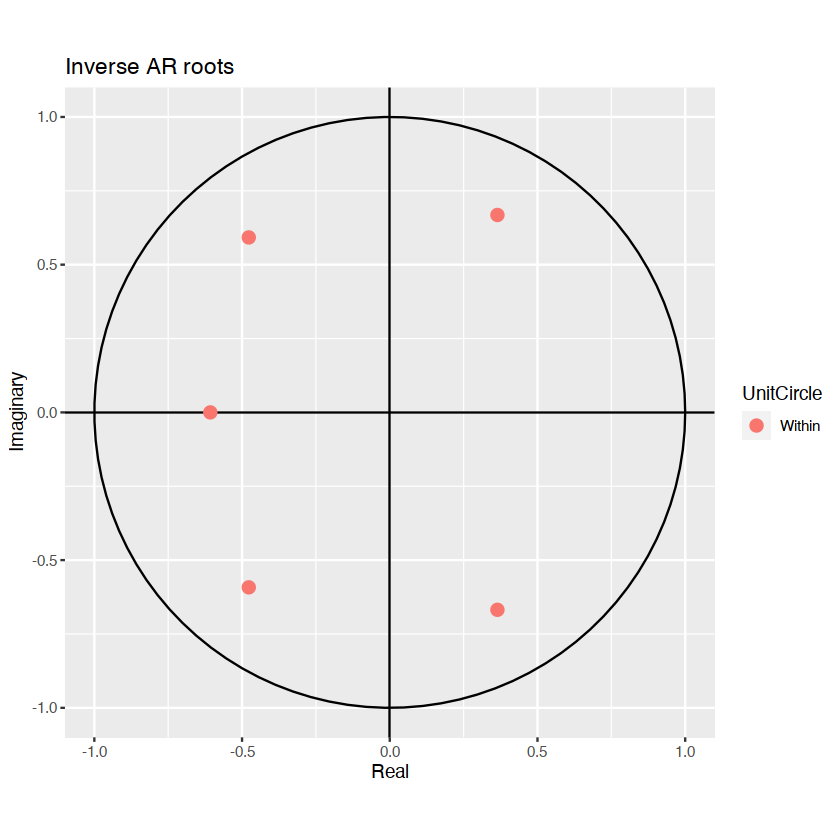

In [302]:
autoplot(fit)

In [307]:
predict(fit,n.ahead = 1)

,Qtr1
2019,2556547887
,Qtr1
2019,1705025504


In [313]:
predict(fit,n.ahead = 4)

,Qtr1,Qtr2,Qtr3,Qtr4
2019,2556547887,2236600867,2724854931,2511837448
,Qtr1,Qtr2,Qtr3,Qtr4
2019,1705025504,1728605362,1785294303,1843645508


In [314]:
fit2 = Arima(GDP_D1_2018, order=c(0,1,6))
summary(fit2)

Series: GDP_D1_2018 
ARIMA(0,1,6) 

Coefficients:
          ma1     ma2      ma3      ma4     ma5      ma6
      -0.9593  0.0738  -0.0157  -0.2537  0.2566  -0.0505
s.e.   0.0662  0.0918   0.0889   0.0938  0.0972   0.0680

sigma^2 estimated as 2.582e+18:  log likelihood=-5290.49
AIC=10594.98   AICc=10595.48   BIC=10619.17

Training set error measures:
                    ME       RMSE        MAE      MPE     MAPE     MASE
Training set 159720307 1582680408 1240515581 18.40378 136.9634 0.621579
                    ACF1
Training set -0.01105114

In [315]:
fit2$bic

[1] 10619.17

In [316]:
fit2$aic

[1] 10594.98

In [317]:
coeftest(fit2)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ma1 -0.959258   0.066204 -14.4894 < 2.2e-16 ***
ma2  0.073812   0.091797   0.8041  0.421355    
ma3 -0.015688   0.088948  -0.1764  0.860001    
ma4 -0.253715   0.093763  -2.7059  0.006811 ** 
ma5  0.256593   0.097177   2.6405  0.008279 ** 
ma6 -0.050507   0.067954  -0.7433  0.457329    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [318]:
confint(fit2)

,2.5 %,97.5 %
ma1,-1.08901526,-0.82949986
ma2,-0.10610773,0.25373126
ma3,-0.19002364,0.15864754
ma4,-0.43748613,-0.06994354
ma5,0.06612851,0.44705703
ma6,-0.18369518,0.08268083



	Ljung-Box test

data:  Residuals from ARIMA(0,1,6)
Q* = 4.5793, df = 3, p-value = 0.2053

Model df: 6.   Total lags used: 9



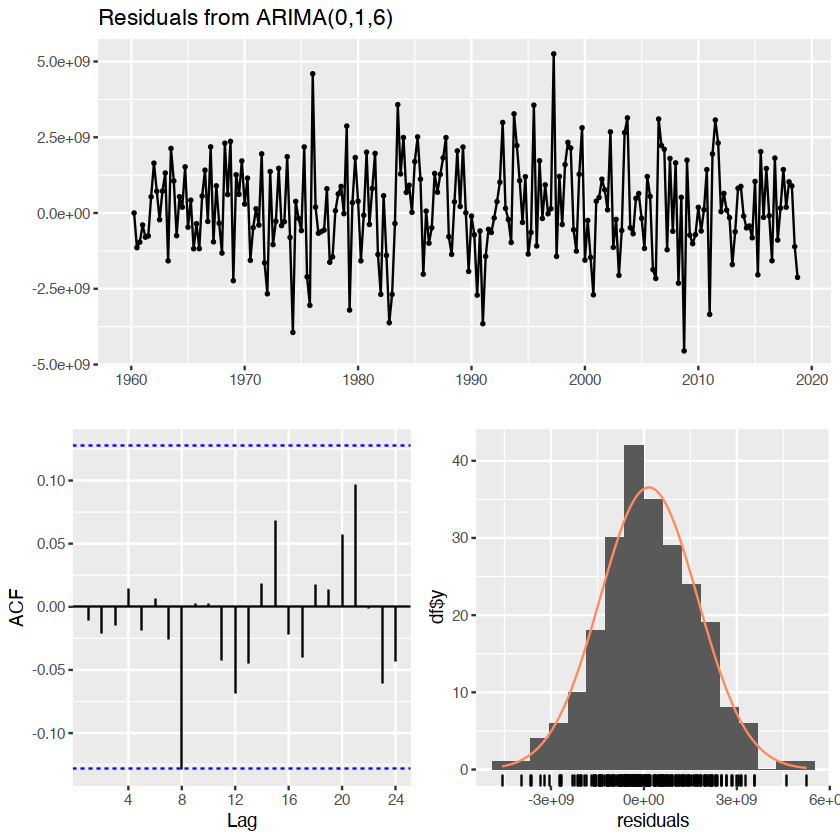

In [319]:
checkresiduals(fit2)

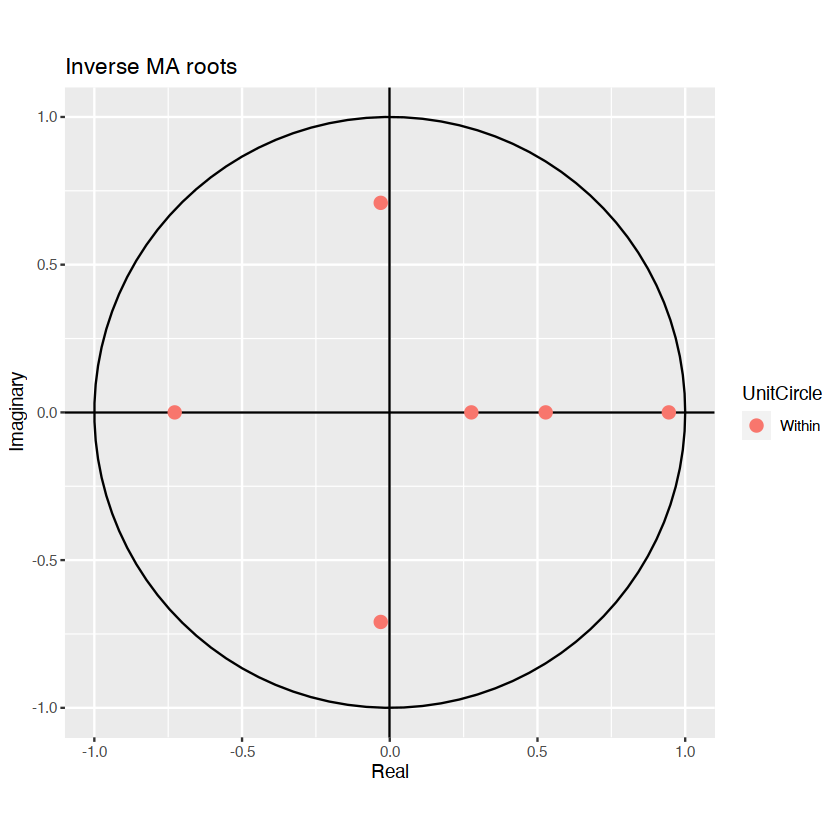

In [320]:
autoplot(fit2)

In [323]:
predict(fit2,n.ahead = 1)

,Qtr1
2019,2442712730
,Qtr1
2019,1606792271


In [324]:
predict(fit2,n.ahead = 4)

,Qtr1,Qtr2,Qtr3,Qtr4
2019,2442712730,2330675149,2823023806,3031701844
,Qtr1,Qtr2,Qtr3,Qtr4
2019,1606792271,1608125312,1618624995,1626401714
